In [44]:
import numpy as np

In [45]:
import pandas as pd

In [46]:
train = pd.read_csv("train.csv")

In [47]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [49]:
train['Mr'] = 0
train['Mrs'] = 0
train['Miss'] = 0
train['royalty'] = 0
train['officer'] = 0

In [50]:
for index,row in train.iterrows():
    name = row['Name']
    if 'Mr.' in name:
        train.set_value(index, 'Mr',1)
    elif 'Mrs.' in name:
        train.set_value(index, 'Mrs',1)
    elif 'Miss.' in name:
        train.set_value(index, 'Miss', 1)
    elif 'Lady' or 'Don' or 'Dona' or 'sir' or 'master' in name:
        train.set_value(index, 'royalty', 1)
    elif 'rev' in name:
        train.set_value(index, 'officer', 1)
        
train.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,royalty,officer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0


In [51]:
train.drop('Name', inplace=True, axis =1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,royalty,officer
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0


In [52]:
train['Embarked_S'] = 0
train['Embarked_C'] = 0
train['Embarked_Q'] = 0
train['Embarked_unknown'] = 0

for index,row in train.iterrows():
    embarkment  = row['Embarked']
    if embarkment == 'S':
        train.set_value(index, 'Embarked_S', 1)
    elif embarkment == 'C':
        train.set_value(index, 'Embarked_C', 1)
    elif embarkment == 'Q':
        train.set_value(index, 'Embakred_Q', 1)
    else:
        train.set_value(index, 'Embarked_unkown', 1)
        
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mrs,Miss,royalty,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,1,0,0,0,NaN,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,1,0,0,NaN,NaN
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,0,0,1,0,0,0,NaN,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,1,0,0,0,1,0,0,0,NaN,NaN
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,1,0,0,0,NaN,NaN


In [53]:
train.drop('Embarked', inplace = True, axis = 1)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mrs,Miss,royalty,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,1,0,0,0,NaN,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,1,0,0,NaN,NaN
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,0,0,1,0,0,0,NaN,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,1,0,0,0,1,0,0,0,NaN,NaN
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,1,0,0,0,NaN,NaN


In [55]:
train.drop('Ticket', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Mr,Mrs,Miss,royalty,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown
0,1,0,3,male,22.0,1,0,7.2500,NaN,1,0,0,0,0,1,0,0,0,NaN,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85,0,1,0,0,0,0,1,0,0,NaN,NaN
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,0,1,0,0,1,0,0,0,NaN,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123,0,1,0,0,0,1,0,0,0,NaN,NaN
4,5,0,3,male,35.0,0,0,8.0500,NaN,1,0,0,0,0,1,0,0,0,NaN,NaN


In [56]:
train['Fare_cheap']=0
train['Fare_average']=0
train['Fare_costly']=0

for index,row in train.iterrows():
    if row['Fare'] <= 30.0:
        train.set_value(index,'Fare_cheap', 1)
    elif row['Fare'] > 30.0 and row['Fare'] <= 70.0:
        train.set_value(index, 'Fare_average', 1)
    else:
        train.set_value(index, 'Fare_costly', 1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Mr,...,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown,Fare_cheap,Fare_average,Fare_costly
0,1,0,3,male,22.0,1,0,7.2500,NaN,1,...,0,1,0,0,0,NaN,NaN,1,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,1,0,0,NaN,NaN,0,0,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,1,0,0,0,NaN,NaN,1,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,1,0,0,0,NaN,NaN,0,1,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,1,...,0,1,0,0,0,NaN,NaN,1,0,0


In [57]:
train.drop('Fare', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Mr,Mrs,...,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown,Fare_cheap,Fare_average,Fare_costly
0,1,0,3,male,22.0,1,0,NaN,1,0,...,0,1,0,0,0,NaN,NaN,1,0,0
1,2,1,1,female,38.0,1,0,C85,0,1,...,0,0,1,0,0,NaN,NaN,0,0,1
2,3,1,3,female,26.0,0,0,NaN,0,0,...,0,1,0,0,0,NaN,NaN,1,0,0
3,4,1,1,female,35.0,1,0,C123,0,1,...,0,1,0,0,0,NaN,NaN,0,1,0
4,5,0,3,male,35.0,0,0,NaN,1,0,...,0,1,0,0,0,NaN,NaN,1,0,0


In [58]:
train.drop('Cabin', inplace = True, axis= 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Mr,Mrs,Miss,...,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown,Fare_cheap,Fare_average,Fare_costly
0,1,0,3,male,22.0,1,0,1,0,0,...,0,1,0,0,0,NaN,NaN,1,0,0
1,2,1,1,female,38.0,1,0,0,1,0,...,0,0,1,0,0,NaN,NaN,0,0,1
2,3,1,3,female,26.0,0,0,0,0,1,...,0,1,0,0,0,NaN,NaN,1,0,0
3,4,1,1,female,35.0,1,0,0,1,0,...,0,1,0,0,0,NaN,NaN,0,1,0
4,5,0,3,male,35.0,0,0,1,0,0,...,0,1,0,0,0,NaN,NaN,1,0,0


In [59]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Mr,Mrs,Miss,royalty,officer,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Embakred_Q,Embarked_unkown,Fare_cheap,Fare_average,Fare_costly
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.0,891.0,77.0,2.0,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,0.580247,0.140292,0.204265,0.075196,0.0,0.722783,0.188552,0.0,0.0,1.0,1.0,0.737374,0.144781,0.117845
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,0.493796,0.347485,0.403390,0.263856,0.0,0.447876,0.391372,0.0,0.0,0.0,0.0,0.440308,0.352078,0.322606
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.0,1.0,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.0,1.0,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,1.000000,1.000000,1.000000


In [61]:
X = train[['Pclass','Age','SibSp','Parch','Mr','Mrs','Miss','royalty','officer','Embarked_S','Embarked_C','Embarked_Q','Embarked_unknown','Fare_cheap','Fare_average','Fare_costly']]
y = train.Survived

X.shape

(891, 16)

In [62]:
y.shape

(891,)

In [65]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

svm_model = SVC()
svm_model.kernel = 'linear'
score_svm = cross_val_score(svm_model, X, y, cv=10, scoring = 'accuracy')
print(score_svm.mean())


0.812554477358


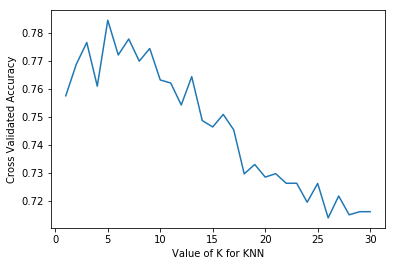

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
k_range= range(1,31)
score_knn_list = []

for n in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = n)
    score_knn = cross_val_score(knn_model, X,y,cv=10, scoring = 'accuracy')
    score_knn_list.append(score_knn.mean())
    
plt.plot(k_range,score_knn_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

In [74]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 5)
score_knn = cross_val_score(knn_model_2,X,y,cv=10, scoring = 'accuracy')
print(score_knn.mean())


0.784601634321
